# Example Usage for YoloClassification

## Load Model

In [1]:
%reset -f
import cv2
import matplotlib.pyplot as plt
from util.YoloModel import YoloClassification

yolo_model = YoloClassification(r"models\yolo11n-cls.pt")
print(f"Training imgsz: {yolo_model.training_imgsz}")

Warming up the model...
Warm-up complete.
Training imgsz: 224


## Single Inference

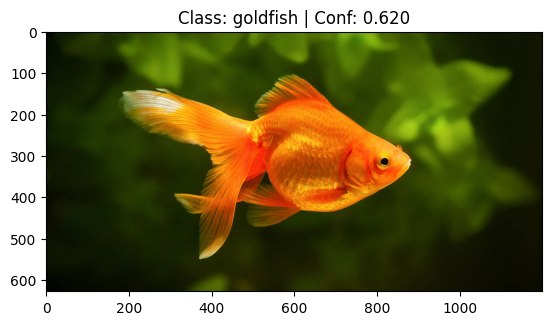

In [2]:
image = cv2.imread(r"images\classify\goldfish.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = yolo_model.predict(image)
cls_name, score = yolo_model.decode_top1(results)
    
plt.imshow(image)
plt.title(f"Class: {cls_name} | Conf: {score:.3f}")
plt.show()

## Batch Inference

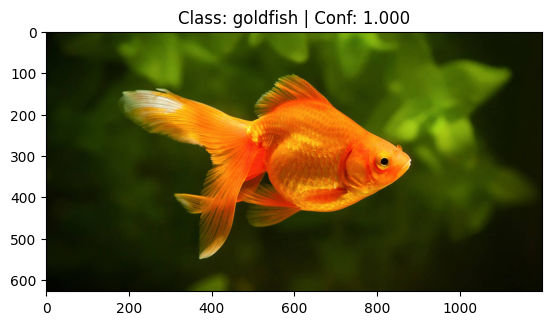

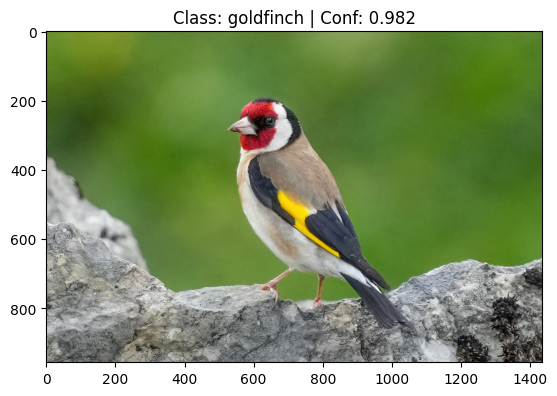

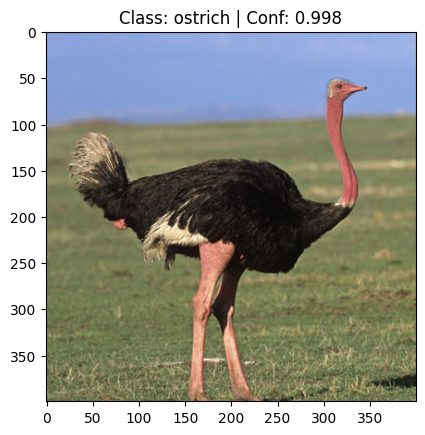

In [3]:
image_list = [
    cv2.imread(r"images\classify\goldfish.jpg"),
    cv2.imread(r"images\classify\goldfinch.jpg"),
    cv2.imread(r"images\classify\ostrich.jpg"),
]

results = yolo_model.predict(image_list)
decode_results = yolo_model.decode_top1(results)

for image, (cls_name, score) in zip(image_list, decode_results):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(f"Class: {cls_name} | Conf: {score:.3f}")
    plt.show()